# Foundations of Predictive Analytics in Python 

## Introduction and base table structure

### Structure of the base table
Consider the predictive modeling problem where you want to predict whether a candidate donor will make a donation in the next year. To build the model, you use historical data and calculate the target in 2017. The target is 1 if a donation is made in 2017 and 0 otherwise. 

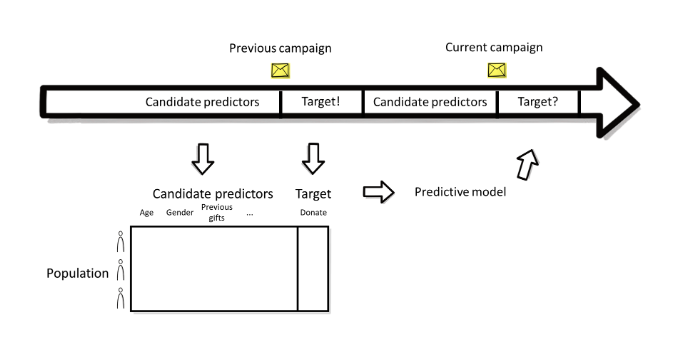

### Exploring the base table


In [1]:
import pandas as pd

In [2]:
basetable = pd.read_csv('data/basetable_ex2_4.csv')
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [3]:
# Assign the number of rows in the basetable 
basetable_size = len(basetable)
print(basetable_size)

25000


In [4]:
# Assign the number of targets to the variable 'targets_count'
target_count =sum(basetable['target'])
print(target_count)

1187


In [5]:
# Print the target incidence.
print(target_count / basetable_size )

0.04748


In [6]:
#Let's find out whether how many  males and females in the population
female = sum(basetable['gender_F'] == 1)
male = sum(basetable['gender_F'] == 0)
print('Female:{} , Male:{}'.format(female, male))

Female:12579 , Male:12421


In [7]:
per_femele = (female/basetable_size)*100
per_male = (male/basetable_size)*100
print('Female: {} %, Male: {} %'.format(per_femele, per_male)) 

Female: 50.316 %, Male: 49.684 %


### Logistic regression
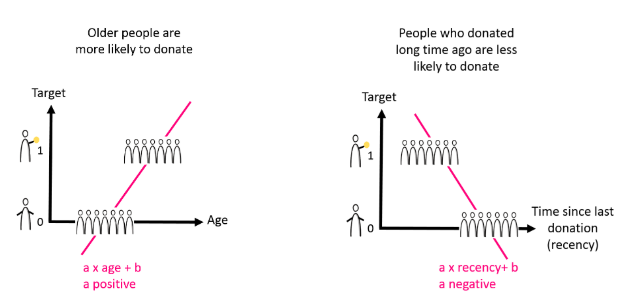

If we plot the target in function of age for all donors in the we that a 1 accurs more to the right, where the older donors are. If we fit a regression line though these points, it is of the form a*x+b, with a positive number. A is called the coefficient of age, and b is called the intercept. If we plot the target as a function of the time since the last donation for each donor, it can be seen that who recently donated, are more likely to danate. in this case coefficient  of recency is negative. 

In [8]:
base_copy = basetable.copy()

In [9]:
base_copy.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


### Interpretation of coefficients
Assume you built a logistic regression model to predict which donors are most likely to donate for a project, using age and time_since_last_gift (number of months since the last gift) as predictors. The output of the logistic regression model is as follows:
```python
y = 0.3 + 4.5*age - 2.3*time_since_last_gift
```
### Building a logistic regression model
You can build a logistic regression model using the module linear_model from sklearn. First, you create a logistic regression model using the LogisticRegression() method:
```python
logreg = linear_model.LogisticRegression()
```
Next, you need to feed data to the logistic regression model, so that it can be fit. X contains the predictive variables, whereas y has the target.
```python
X = basetable[["predictor_1","predictor_2","predictor_3"]]`
y = basetable[["target"]]
logreg.fit(X,y)
```
### Showing the coefficients and intercept
Once the logistic regression model is ready, it can be interesting to have a look at the coefficients to check whether the model makes sense.

Given a fitted logistic regression model logreg, you can retrieve the coefficients using the attribute `coef_`. The order in which the coefficients appear, is the same as the order in which the variables were fed to the model. The intercept can be retrieved using the attribute `intercept_`.

In [10]:
# Import linear_model from sklearn.
from sklearn import linear_model

In [11]:
# Create a dataframe X that only contains the candidate predictors age, gender_F and time_since_last_gift.
X = basetable[['age', 'gender_F', 'time_since_last_gift']]
# Create a dataframe y that contains the target
y =basetable['target']
# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predictors = ["age","gender_F","time_since_last_gift"]

# Assign the coefficients to a list coef
coef = logreg.coef_

for c,p in zip(predictors,list(coef[0])):
    print(p , c)
print(logreg.intercept_)

    


0.007178355658921441 age
0.11430414536794431 gender_F
-0.0013087501133203447 time_since_last_gift
[-2.54149728]


In [13]:
basetable_predict = basetable[predictors]
prediction= logreg.predict_proba(basetable_predict)
print(prediction[0:5])

[[0.93427169 0.06572831]
 [0.9454883  0.0545117 ]
 [0.9185279  0.0814721 ]
 [0.95269877 0.04730123]
 [0.94745512 0.05254488]]


### Calculating AUC

The AUC value assesses how well a model can order observations from low probability to be target to high probability to be target. In Python, the roc_auc_score function can be used to calculate the AUC of the model. It takes the true values of the target and the predictions as arguments.



In [14]:
from sklearn.metrics import roc_auc_score
# Make predictions
prediction_X = logreg.predict_proba(X)
prediction_X_target = prediction_X[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, prediction_X_target)
print(round(auc,2))

0.63


In [15]:
#Trying differetn model 
variable_1 = ['mean_gift', 'income_low']
variable_2 = ['mean_gift', 'income_low', 'gender_F', 'country_India', 'age']

X_1 = basetable[variable_1]
X_2 = basetable[variable_2]

In [16]:
logreg.fit(X_1, y)
prediction_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(y, prediction_1)

In [17]:
logreg.fit(X_2,y)
prediction_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(y, prediction_2)

In [18]:
print(round(auc_1,2))
print(round(auc_2,2))

0.68
0.69


### Forward stepwise variable selection
#### Selecting the next best variable
The forward stepwise variable selection method starts with an empty variable set and proceeds in steps, where in each step the next best variable is added. To implement this procedure, two handy functions have been implemented for you.

The `auc_score` function calculates for a given variable set variables the AUC of the model that uses this variable set as predictors. The `next_best_variable` function calculates which variable should be added in the next step to the variable list.


In [19]:
def auc_score(variable, target, df):
    X = df[variable]
    y = df[target]
    
    logreg = linear_model.LogisticRegression()
    logreg.fit(X,y)
    predict = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predict)
    return (auc)
    

In [20]:
#defining a functiong that loop the candidate variable to find out next variable combination
def next_best_variable(current_varibales, candidate_variables, target, df):
    best_auc = -1
    best_variable = None
    
    for v in candidate_variables:
        auc_v = auc_score(current_varibales + [v], target, df)
        
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable =v 
    return best_variable    

In [21]:
# Calculate the AUC of a model that uses "max_gift", "mean_gift" and "min_gift" as predictors
current_auc = auc_score(["max_gift", "mean_gift","min_gift"],'target', basetable)
print(round(current_auc, 4))


0.7125


In [22]:
# Calculate which variable among "age" and "gender_F" should be added to the variables 
#"max_gift", "mean_gift" and "min_gift"

next_variable = next_best_variable(["max_gift", "mean_gift","min_gift"],["age","gender_F"], 'target', basetable)
print(next_variable)


age


In [23]:
# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "age" as predictors
current_auc_age = auc_score(["max_gift", "mean_gift","min_gift","age"],'target', basetable)
print(round(current_auc_age,4))


0.7148


In [24]:
current_auc_gender_F = auc_score(["max_gift", "mean_gift","min_gift","gender_F"],'target', basetable)
print(round(current_auc_gender_F,4))

0.713


**Nice! The model that has age as next variable has a better AUC than the model that has gender_F as next variable. Therefore, age is selected as the next best variable.**

#### Finding the order of variables
The forward stepwise variable selection procedure starts with an empty set of variables, and adds predictors one by one. In each step, the predictor that has the highest AUC in combination with the current variables is selected.

In [25]:
# Find the candidate variables
#Create the candidates variable 
candidate_variable = list(basetable.columns.values)
print(candidate_variable)

['target', 'gender_F', 'income_high', 'income_low', 'country_USA', 'country_India', 'country_UK', 'age', 'time_since_last_gift', 'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift', 'number_gift']


In [26]:
candidate_variable.remove('target')

In [27]:
# Initialize the current variables
current_variable =[]

In [28]:
# The forward stepwise variable selection procedure
number_of_iteration =5

for i in range (0, number_of_iteration):
    
    next_variable = next_best_variable(current_variable, candidate_variable, 'target', basetable)
    current_variable = current_variable + [next_variable]
    candidate_variable.remove(next_variable)
    
    print('Variable added in step '+str(i+1)+ ' is '+next_variable)
print(current_variable)

Variable added in step 1 is max_gift
Variable added in step 2 is number_gift
Variable added in step 3 is time_since_last_gift
Variable added in step 4 is mean_gift
Variable added in step 5 is age
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age']


In [29]:
current_list_auc = auc_score(current_variable, 'target', basetable)
print(current_list_auc)

0.768756710130262


#### Correlated variables
you can test this calculating the correlation between these variables:
```python
import numpy
numpy.corrcoef(basetable["variable_1"],basetable["variable_2"])[0,1]
```

In [30]:
#if we look at first 10 variable
candidate_variable_10 = list(basetable.columns.values)
current_variable_10 = []

In [31]:
for i in range (0, 10):
    
    next_variable_10 = next_best_variable(current_variable_10, candidate_variable_10, 'target', basetable)
    current_variable_10 = current_variable_10 + [next_variable_10]
    candidate_variable_10.remove(next_variable_10)
    
    print('Variable added in step '+str(i+1)+ ' is '+next_variable_10)
print(current_variable_10)

Variable added in step 1 is target
Variable added in step 2 is number_gift
Variable added in step 3 is mean_gift
Variable added in step 4 is min_gift
Variable added in step 5 is max_gift
Variable added in step 6 is time_since_last_gift
Variable added in step 7 is time_since_first_gift
Variable added in step 8 is age
Variable added in step 9 is country_UK
Variable added in step 10 is country_India
['target', 'number_gift', 'mean_gift', 'min_gift', 'max_gift', 'time_since_last_gift', 'time_since_first_gift', 'age', 'country_UK', 'country_India']


#### Partitioning
In order to properly evaluate a model, one can partition the data in a train and test set. The train set contains the data the model is built on, and the test data is used to evaluate the model. This division is done randomly, but when the target incidence is low, it could be necessary to stratify, that is, to make sure that the train and test data contain an equal percentage of targets.

In [39]:
from sklearn.cross_validation import train_test_split

In [40]:
X_basetable = basetable.drop('target', 1)
y_basetable = basetable['target']

In [41]:
# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X_basetable, y_basetable, test_size=0.3, stratify = y)

In [42]:
# Create the final train and test basetables
train = pd.concat([X_train, y_train], 1)
test  = pd.concat([X_test, y_test], 1) 

In [43]:
# Check whether train and test have same percentage targets
print(round(sum(train['target'])/len(train),2))
print(round(sum(test['target'])/len(test),2))

0.05
0.05


In [48]:
def auc_train_test(var, target, df_train, df_test):
    logreg =linear_model.LogisticRegression()
    train_X = df_train[var]
    train_y = df_train[target]
    
    test_X  = df_test[var]
    test_y  = df_test[target]
    
    logreg.fit(train_X, train_y)
    predict_train = logreg.predict_proba(train_X)[:,1]
    auc_train = roc_auc_score(train_y, predict_train)
      
    logreg.fit(test_X, test_y)
    predict_test = logreg.predict_proba(test_X)[:,1]
    auc_test = roc_auc_score(test_y, predict_test)
    return (auc_train, auc_test)

In [51]:
# Apply the auc_train_test function
auc_train, auc_test = auc_train_test(['age', 'gender_F'], 'target', train, test)
print(round(auc_train,2))
print(round(auc_test, 2))
    

0.53
0.57


#### Building the AUC curves
The forward stepwise variable selection procedure provides an order in which variables are optimally added to the predictor set. In order to decide where to cut off the variables, you can make the train and test AUC curves. These curves plot the train and test AUC using the first, first two, first three, ... variables in the model.

In [91]:
variables = list(train.columns.values)
variables.remove('target')
print(variables)

['gender_F', 'income_high', 'income_low', 'country_USA', 'country_India', 'country_UK', 'age', 'time_since_last_gift', 'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift', 'number_gift']


In [92]:
auc_values_train = []
auc_values_test   = []
variables_evaluate = []

In [93]:
for v in variables:   
    variables_evaluate.append(v)
    auc_train, auc_test = auc_train_test(variables_evaluate, 'target', train, test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test) 

In [94]:
import matplotlib.pyplot as plt
import numpy as np

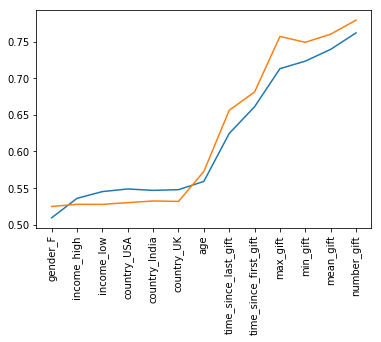

In [98]:
x_range = np.array(range(0,len(auc_values_train)))
y_plt_train = np.array(auc_values_train)
y_plt_test = np.array(auc_values_test)
plt.xticks(x_range, variables, rotation=90)
plt.plot(x_range, y_plt_train)
plt.plot(x_range, y_plt_test)
plt.show()
             

#### The cumulative gains curve
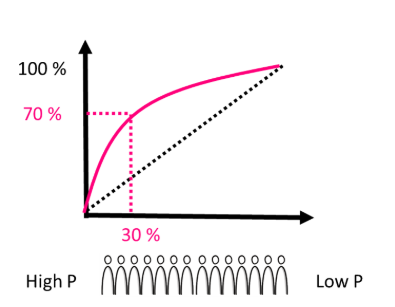

First you order all the observation according to the output of the model.On the left hand side are observations with highest probability to be target according to the model, on the rigt hand side are observations with lowest probability to be target. On the horizantal axis of the cumulative gains curve is indicated which percentage of the observations considered. For instance, the 30% observations with highest probability to be target is considered. On the vertical axis, the curves indicade which percentage of all target is included in this group. 

The cumulative gains curves is great tool to compare to the models. The more the line is situated to upper corner , the better the model.
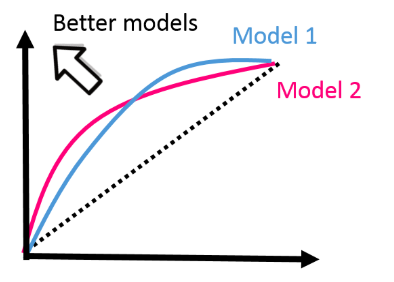
When the two models curves cross each other, it is not straightforword to decide which model is better. In this case, we could say that model2 is better to distinguish the top 10% observations from the rest while, model 1 is better to distinguish the top 70% observations from the rest. 



#### Constructing the cumulative gains curve
The cumulative gains curve is an evaluation curve that assesses the performance of your model. It shows the percentage of targets reached when considering a certain percentage of your population with the highest probability to be target according to your model.

To construct this curve, you can use the .plot_cumulative_gain() method in the scikitplot module and the matplotlib.pyplot module. As for each model evaluation metric or curve, you need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

In [122]:
import scikitplot as skplt
model_1_variable = ['time_since_last_gift', 'max_gift', 'min_gift','mean_gift', 'number_gift']

model_1_feture_train = train[model_1_variable]
model_1_target_train = train['target']

logreg.fit(model_1_feture_train, model_1_target_train)
model_1_train = logreg.predict_proba(model_1_feture_train)
#prediction_model_1_train = logreg.predict_proba(model_1_feture_train)[:1]
#auc_score_model_1 = roc_auc_score(model_1_target_train, prediction_model_1_train)
#print(auc_score_model_1)

[[0.96726436 0.03273564]]


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


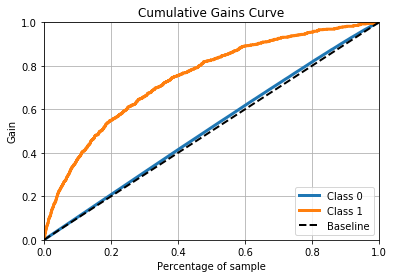

In [123]:
print(prediction_model_1_train)
skplt.metrics.plot_cumulative_gain(model_1_target_train,model_1_train)

#### Constructing the lift curve
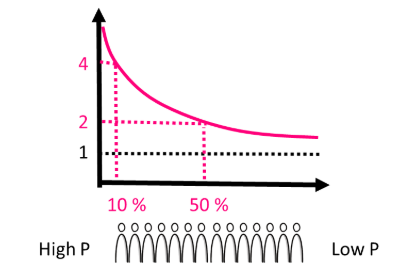


The lift curve is an evaluation curve that assesses the performance of your model. It shows how many times more than average the model reaches targets.

To construct this curve, you can use the plot_lift_curve method in the scikitplot module and the matplotlib.pyplot module. As for each model evaluation metric or curve, you need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


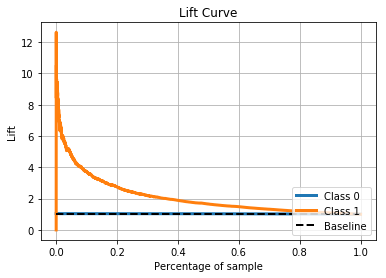

In [124]:
skplt.metrics.plot_lift_curve(model_1_target_train,model_1_train)
plt.show()

#### Business case using lift curve
```python
profit = profit(perc_targets, perc_selected, population_size, campaign_cost, campaign_reward)
```
In this method, perc_targets is the percentage of targets in the group that you select for your campaign, perc_selected the percentage of people that is selected for the campaign, population_size the total population size, campaign_cost the cost of addressing a single person for the campaign, and campaign_reward the reward of addressing a target.

In [131]:
def profit(perc_targets, perc_selected, population_size, campaign_cost, campaign_reward):
    cost = campaign_cost * perc_selected * population_size
    reward = campaign_reward * perc_targets * perc_selected * population_size
    return reward -cost   

In [132]:
perc_selected = 0.4
lift = 2 #(from lift curve at 40% selected)

# Information about the campaign
population_size, target_incidence, campaign_cost, campaign_reward = 100000, 0.01, 1, 100

In [133]:
# perc_targets =target_incidence *lift (lift here 1 because at 100%)
#perc_slected =1 (100%)
profit_all = profit(target_incidence,1, population_size, campaign_cost, campaign_reward)
print(profit_all)

0.0


In [134]:
profit_40 = profit(target_incidence*lift,0.4, population_size, campaign_cost, campaign_reward)
print(profit_40)

40000.0


**When addressing the entire donor base, you do not make any profit at all. When using the predictive model, you can make 40,000 Euro profit!**

#### Business case using cumulative gains curve
The cumulative gains graph can be used to estimate how many donors one should address to make a certain profit. Indeed, the cumulative gains graph shows which percentage of all targets is reached when addressing a certain percentage of the population. If one knows the reward of a campaign, it follows easily how many donors should be targeted to reach a certain profit.

In this exercise, you will calculate how many donors you should address to obtain a 30 000 Euro profit.
1-Assume the cost of a campaign is 0 Euro and the reward of addressing a target is 50 Euro. Fill out how many targets should be reached to make 30 000 Euro profit.
2-There are 1000 targets in total. Fill out which percentage of the targets should be addressed.
3-Use the cumulative gains curve to know which percentage of the population should be addressed. Round to the tenth.
4-Given that the population consists of 10 000 donors, fill out how many donors should be addressed.
```python
# Number of targets you want to reach
number_targets_toreach = 30000 / 50
perc_targets_toreach = number_targets_toreach / 1000
cumulative_gains = 0.4
number_donors_toreach = cumulative_gains * 10000

```